In [1]:
import cv2
import numpy as np
#import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import pylab as plt
from scipy import ndimage
import pandas as pd

#file='test.png'
file='test2.png'
img = cv2.imread(file ,1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255
img_np=np.array(img)

In [2]:
flatten=img.reshape(-1,3)

In [3]:
flatten

array([[0.19215686, 0.68235294, 0.23529412],
       [0.18039216, 0.67843137, 0.29803922],
       [0.25098039, 0.69411765, 0.26666667],
       ...,
       [0.71372549, 0.7372549 , 0.23921569],
       [0.72156863, 0.74509804, 0.24313725],
       [0.73333333, 0.74117647, 0.24313725]])

In [4]:
from sklearn.cluster import KMeans
pred=KMeans(n_clusters=7,random_state=1).fit(flatten)

In [5]:
len(pred.labels_)

57132

In [6]:
out = zip(pred.labels_, flatten)
# 赤系のクラスタ
clu0 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==0])
# 緑系のクラスタ
clu1 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==1])
# 青系のクラスタ
clu2 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==2])

clu3 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==3])

clu4 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==4])
# 緑系のクラスタ
clu5 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==5])
# 青系のクラスタ
clu6 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==6])

clu7 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==7])

In [7]:
pred.labels_.dtype

dtype('int32')

In [8]:
flatten

array([[0.19215686, 0.68235294, 0.23529412],
       [0.18039216, 0.67843137, 0.29803922],
       [0.25098039, 0.69411765, 0.26666667],
       ...,
       [0.71372549, 0.7372549 , 0.23921569],
       [0.72156863, 0.74509804, 0.24313725],
       [0.73333333, 0.74117647, 0.24313725]])

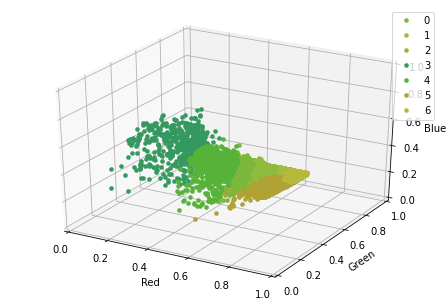

In [9]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
"""
color0 = pred.cluster_centers_[0] / 255
color1 = pred.cluster_centers_[1] / 255
color2 = pred.cluster_centers_[2] / 255
color3 = pred.cluster_centers_[3] / 255
color4 = pred.cluster_centers_[4] / 255
color5 = pred.cluster_centers_[5] / 255
color6 = pred.cluster_centers_[6] / 255
"""
color0 = pred.cluster_centers_[0]
color1 = pred.cluster_centers_[1]
color2 = pred.cluster_centers_[2]
color3 = pred.cluster_centers_[3]
color4 = pred.cluster_centers_[4]
color5 = pred.cluster_centers_[5]
color6 = pred.cluster_centers_[6]

fig=pyplot.figure()
ax=Axes3D(fig)

ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
# 表示範囲の設定
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.plot(clu0[:,0], clu0[:,1], clu0[:,2], "o", color=color0, ms=4, mew=0.5,label=0)
ax.plot(clu1[:,0], clu1[:,1], clu1[:,2], "o", color=color1, ms=4, mew=0.5,label=1)
ax.plot(clu2[:,0], clu2[:,1], clu2[:,2], "o", color=color2, ms=4, mew=0.5,label=2)
ax.plot(clu3[:,0], clu3[:,1], clu3[:,2], "o", color=color3, ms=4, mew=0.5,label=3)
ax.plot(clu4[:,0], clu4[:,1], clu4[:,2], "o", color=color4, ms=4, mew=0.5,label=4)
ax.plot(clu5[:,0], clu5[:,1], clu5[:,2], "o", color=color5, ms=4, mew=0.5,label=5)
ax.plot(clu6[:,0], clu6[:,1], clu6[:,2], "o", color=color6, ms=4, mew=0.5,label=6)
ax.legend()
pyplot.show()

### ここからはクラスタの並び替え

In [10]:
flatten

array([[0.19215686, 0.68235294, 0.23529412],
       [0.18039216, 0.67843137, 0.29803922],
       [0.25098039, 0.69411765, 0.26666667],
       ...,
       [0.71372549, 0.7372549 , 0.23921569],
       [0.72156863, 0.74509804, 0.24313725],
       [0.73333333, 0.74117647, 0.24313725]])

- RGBの配列(flatten)をKMeansで分類
- RGB，原点からの距離，ラベルを結合したデータフレームを作る

In [11]:
c_pred=KMeans(n_clusters=7,random_state=1).fit_predict(flatten)
df = pd.DataFrame(data=flatten, columns=['R', 'G', 'B'])
df["Distance"]=np.sqrt(pow(df["R"],2)+pow(df["G"],2)+pow(df["B"],2))
df['C_pred'] =  c_pred
df["Number"]=np.arange(0,len(df))

In [12]:
df.head()

R         G         B  Distance  C_pred  Number
0  0.192157  0.682353  0.235294  0.746922       4       0
1  0.180392  0.678431  0.298039  0.762652       3       1
2  0.250980  0.694118  0.266667  0.784794       4       2
3  0.337255  0.721569  0.223529  0.827265       4       3
4  0.403922  0.733333  0.231373  0.868599       4       4

- Distance列をキーにして距離の昇順に並べ替え

In [13]:
#Distanceの最小値の確認
min(df["Distance"])

0.3104981053618442

In [14]:
#並び替え
df_new=df.sort_values("Distance")
df_new.head()

R         G         B  Distance  C_pred  Number
48355  0.070588  0.219608  0.207843  0.310498       3   48355
48630  0.137255  0.254902  0.184314  0.343199       3   48630
41354  0.129412  0.243137  0.313725  0.417477       3   41354
14196  0.074510  0.223529  0.352941  0.424364       3   14196
48631  0.192157  0.286275  0.282353  0.445646       3   48631

In [15]:
min(df["C_pred"])

0

In [16]:
#参考URL：https://www.webdevqa.jp.net/ja/sorting/pandas-groupby%E9%99%8D%E9%A0%86%E3%81%A7%E4%B8%A6%E3%81%B9%E6%9B%BF%E3%81%88/1050740078/
df_new['C_pred_sorted'] =  df_new['C_pred'].replace(df_new.groupby('C_pred')['Distance'].median().sort_values().index,range(7))

- これで距離順にソートされたはず

In [17]:
df_new.to_csv("df_new.csv")

In [18]:
df_moto=pd.concat([df_new["R"],df_new["G"],df_new["B"]],axis=1)
len(df_moto)

57132

In [19]:
print(len(np.array(df_new['C_pred_sorted'])))
print(len(np.array(df_moto)))

57132
57132


In [20]:
np.array(df_moto)[55000:]

array([[0.72156863, 0.74117647, 0.24313725],
       [0.74117647, 0.72156863, 0.24313725],
       [0.74117647, 0.72156863, 0.24313725],
       ...,
       [0.74901961, 0.74901961, 0.25098039],
       [0.74901961, 0.74901961, 0.25098039],
       [0.74901961, 0.74901961, 0.25098039]])

In [21]:
np.array(df_new['C_pred_sorted'])

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

### ここ以下がうまくいかない
- "out_1 = zip(np.array(df_new['C_pred_sorted']), np.array(df_moto))"を読み込んでくれないので都度読み込み．

In [22]:
out_1 = zip(np.array(df_new['C_pred_sorted']), np.array(df_moto))
# 赤系のクラスタ
clu0_1 = np.array([data.tolist() for label, data in out_1 if label==0])

out_1 = zip(np.array(df_new['C_pred_sorted']), np.array(df_moto))
# 緑系のクラスタ
clu1_1 = np.array([data.tolist() for label, data in out_1 if label==1])

out_1 = zip(np.array(df_new['C_pred_sorted']), np.array(df_moto))
# 青系のクラスタ
clu2_1 = np.array([data.tolist() for label, data in out_1 if label==2])

out_1 = zip(np.array(df_new['C_pred_sorted']), np.array(df_moto))
clu3_1 = np.array([data.tolist() for label, data in out_1 if label==3])

out_1 = zip(np.array(df_new['C_pred_sorted']), np.array(df_moto))
clu4_1 = np.array([data.tolist() for label, data in out_1 if label==4])

# 緑系のクラスタ
out_1 = zip(np.array(df_new['C_pred_sorted']), np.array(df_moto))
clu5_1 = np.array([data.tolist() for label, data in out_1 if label==5])
# 青系のクラスタ
out_1 = zip(np.array(df_new['C_pred_sorted']), np.array(df_moto))
clu6_1 = np.array([data.tolist() for label, data in out_1 if label==6])

# クラスタ数は7だからこの8番目クラスタは無意味だけど，エラーはおきない．
clu7_1 = np.array([data.tolist() for label, data in out_1 if label==7])


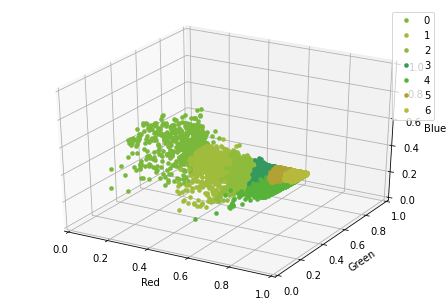

In [23]:
fig=pyplot.figure()
ax=Axes3D(fig)

ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
# 表示範囲の設定
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.plot(clu0_1[:,0], clu0_1[:,1], clu0_1[:,2], "o", color=color0, ms=4, mew=0.5,label=0)
ax.plot(clu1_1[:,0], clu1_1[:,1], clu1_1[:,2], "o", color=color1, ms=4, mew=0.5,label=1)
ax.plot(clu2_1[:,0], clu2_1[:,1], clu2_1[:,2], "o", color=color2, ms=4, mew=0.5,label=2)
ax.plot(clu3_1[:,0], clu3_1[:,1], clu3_1[:,2], "o", color=color3, ms=4, mew=0.5,label=3)
ax.plot(clu4_1[:,0], clu4_1[:,1], clu4_1[:,2], "o", color=color4, ms=4, mew=0.5,label=4)
ax.plot(clu5_1[:,0], clu5_1[:,1], clu5_1[:,2], "o", color=color5, ms=4, mew=0.5,label=5)
ax.plot(clu6_1[:,0], clu6_1[:,1], clu6_1[:,2], "o", color=color6, ms=4, mew=0.5,label=6)
ax.legend()
plt.savefig(rf"hist_{file}_.png",transparent=True,bbox_inches="tight")# rfで保存する．rだとOSエラー
pyplot.show()


In [24]:
df_mostnew=df_new.sort_values('Number')

In [25]:
Label=np.array(df_mostnew['C_pred_sorted'])
#a=np.where(np.logical_or(Label==1,Label==2,Label==4),256,0)
#kouhan1用
#a=np.where(np.logical_or(np.logical_or(pred.labels_==1,pred.labels_==4),pred.labels_==2),256,0)

#PAO30＿CRCYS
a=np.where(np.logical_or(np.logical_or(pred.labels_==3,pred.labels_==4),pred.labels_==3),256,0)


In [29]:
result=a.reshape([207,276])
import numpy as np
from PIL import Image
pil_image=Image.fromarray(result)
pil_image.show()
image = Image.fromarray(result)
pil_image.save(rf"result_{file}_.png") 

In [27]:
result

array([[256, 256, 256, ...,   0,   0,   0],
       [256, 256, 256, ...,   0,   0,   0],
       [256, 256, 256, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])